# Wage

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## ZeroR Classifier

In [47]:
file_path = "DT-Wage.csv"
column_names = ['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'logwage', 'wage']
df = pd.read_csv(file_path, skiprows=1, names=column_names)
df.sample(8)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
2043,2008,37,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.623249,101.824352
2727,2008,55,4. Divorced,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.863323,129.453645
2776,2006,36,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,5.301030,200.543262
1040,2008,20,1. Never Married,1. White,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.414973,82.679637
1458,2006,50,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.361728,78.392467
2192,2005,42,4. Divorced,1. White,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.716003,111.720849
1178,2008,35,5. Separated,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.934498,139.003408
323,2009,55,2. Married,3. Asian,1. < HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.000000,54.598150


In [80]:
df['race'].value_counts()

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64

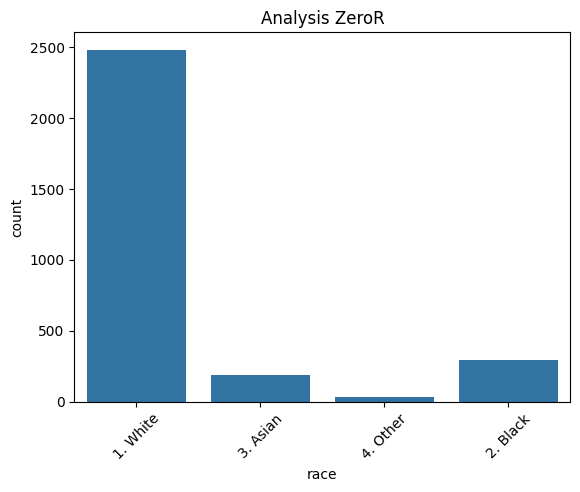

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='race')
plt.title("Analysis ZeroR")
plt.xlabel("race")
plt.xticks(rotation=45)  
plt.show()

In [64]:
edu_counts = df['education'].value_counts()
valid_edu = edu_counts[edu_counts >= 2].index
df = df[df['education'].isin(valid_edu)]

In [82]:
X = df.drop('race', axis=1)
y = df['race']

# Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

# Validation (15%) and Test (15%) from Tempjobclass
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Print sizes
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (2100, 10)
Validation: (450, 10)
Test: (450, 10)


In [83]:
from sklearn.metrics import accuracy_score

# ZeroR Classifier: Predict the most common education level
most_common_class = y_train.mode()[0]
print("ZeroR always predicts:", most_common_class)

# Predicting for validation and test sets
y_val_predZeroR = [most_common_class] * len(y_val)
y_test_predZeroR = [most_common_class] * len(y_test)

# Accuracy calculation
val_accuracyZeroR = accuracy_score(y_val, y_val_predZeroR)
test_accuracyZeroR = accuracy_score(y_test, y_test_predZeroR)

print(f"Validation Accuracy: {val_accuracyZeroR:.2f}")
print(f"Test Accuracy: {test_accuracyZeroR:.2f}")


ZeroR always predicts: 1. White
Validation Accuracy: 0.83
Test Accuracy: 0.83


## OneR Classifier

In [84]:
!pip install mlxtend

In [85]:
from mlxtend.classifier import OneRClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Encode categorical features
X_train_encoded = X_train.apply(LabelEncoder().fit_transform)
X_val_encoded = X_val.apply(LabelEncoder().fit_transform)
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_val_encoded = LabelEncoder().fit_transform(y_val)

#Convert to NumPy arrays
X_train_np = X_train_encoded.to_numpy()
X_val_np = X_val_encoded.to_numpy()

#Train OneR model
oner = OneRClassifier()
oner.fit(X_train_np, y_train_encoded)

#Predict
y_val_predOneR = oner.predict(X_val_np)

# Print best feature index and name
best_feature_idx = oner.feature_idx_
best_feature_name = X_train.columns[best_feature_idx]

print(f"OneR best feature index: {best_feature_idx}")
print(f"OneR best feature name: {best_feature_name}")
print(f"OneR best feature: {oner.feature_idx_}")
print(f"Validation Accuracy: {accuracy_score(y_val_encoded, y_val_predOneR):.2f}")

OneR best feature index: 8
OneR best feature name: logwage
OneR best feature: 8
Validation Accuracy: 0.77


## Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Naive Bayes classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train_encoded, y_train_encoded)

#Validation Predictions
y_val_pred_nb = nb_classifier.predict(X_val_encoded)
print("Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred_nb))
print("\nValidation Classification Report:\n", classification_report(y_val_encoded, y_val_pred_nb))

#Test Predictions
y_test_encoded = LabelEncoder().fit_transform(y_test)
X_test_encoded = X_test.apply(LabelEncoder().fit_transform)
y_test_pred_nb = nb_classifier.predict(X_test_encoded)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_test_pred_nb))
print("\nTest Classification Report:\n", classification_report(y_test_encoded, y_test_pred_nb))

Validation Accuracy: 0.72

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       372
           1       0.09      0.09      0.09        44
           2       0.20      0.10      0.14        29
           3       0.00      0.00      0.00         5

    accuracy                           0.72       450
   macro avg       0.28      0.26      0.27       450
weighted avg       0.70      0.72      0.71       450

Test Accuracy: 0.7088888888888889

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       372
           1       0.18      0.23      0.20        44
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00         6

    accuracy                           0.71       450
   macro avg       0.25      0.26      0.26       450
weighted avg       0.70      0.71      0.71       450



## Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train_encoded)

# Make predictions on the validation set
y_val_pred_dt = dt_classifier.predict(X_val_encoded)

# Evaluate the classifier
print("Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred_dt))
print("\nClassification Report:\n", classification_report(y_val_encoded, y_val_pred_dt))

Validation Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       372
           1       0.14      0.20      0.17        44
           2       0.09      0.10      0.10        29
           3       0.00      0.00      0.00         5

    accuracy                           0.66       450
   macro avg       0.26      0.27      0.26       450
weighted avg       0.71      0.66      0.68       450



## KNeighbors Classifier

In [88]:
from sklearn.preprocessing import LabelEncoder

X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_test_enc = X_test.copy()

encoders = {}

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(X_train[col])

        # Extend classes to handle unseen categories
        classes = list(le.classes_) + ['__unknown__']
        le.classes_ = np.array(classes)

        # Replace unseen values with '__unknown__' before transforming
        X_train_enc[col] = le.transform(X_train[col])
        X_val_enc[col] = X_val[col].apply(lambda x: x if x in le.classes_ else '__unknown__')
        X_val_enc[col] = le.transform(X_val_enc[col])
        X_test_enc[col] = X_test[col].apply(lambda x: x if x in le.classes_ else '__unknown__')
        X_test_enc[col] = le.transform(X_test_enc[col])

        encoders[col] = le

In [89]:
le_y = LabelEncoder()

y_train_enc = le_y.fit_transform(y_train)
y_val_enc = le_y.transform(y_val)
y_test_enc = le_y.transform(y_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_enc, y_train_enc)
# Predict class labels for the validation set
y_val_predKN = knn.predict(X_val_enc)
val_accuracyKN = accuracy_score(y_val_enc, y_val_predKN)
print(f"Validation Accuracy (K=3): {val_accuracyKN:.2f}")

Validation Accuracy (K=3): 0.79


## SVM

In [91]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_np, y_train_encoded)

y_val_predSVM = svm_clf.predict(X_val_np)

accuracySVM = accuracy_score(y_val_enc, y_val_predSVM)
print(f"SVM Validation Accuracy: {accuracySVM:.2f}")

SVM Validation Accuracy: 0.83


## Evaluation

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Average Precision: {precision:.4f}")
    print(f"Average Recall: {recall:.4f}")
    print(f"Average F-score: {fscore:.4f}")
    print()


In [93]:
y_val_predZeroR_encoded = le_y.transform(y_val_predZeroR)
evaluate_model('ZeroR', y_val_enc, y_val_predZeroR_encoded)
evaluate_model('OneR', y_val_enc, y_val_predOneR)
evaluate_model('Naive Bayes', y_val_enc, y_val_pred_nb)
evaluate_model('Decision Tree', y_val_enc, y_val_pred_dt)
evaluate_model('KNN', y_val_enc, y_val_predKN)
evaluate_model('SVM', y_val_enc, y_val_predSVM)

--- ZeroR ---
Accuracy: 0.8267
Confusion Matrix:
[[372   0   0   0]
 [ 44   0   0   0]
 [ 29   0   0   0]
 [  5   0   0   0]]
Average Precision: 0.6834
Average Recall: 0.8267
Average F-score: 0.7482

--- OneR ---
Accuracy: 0.7667
Confusion Matrix:
[[343  20   5   4]
 [ 42   2   0   0]
 [ 29   0   0   0]
 [  5   0   0   0]]
Average Precision: 0.6856
Average Recall: 0.7667
Average F-score: 0.7229

--- Naive Bayes ---
Accuracy: 0.7200
Confusion Matrix:
[[317  40  11   4]
 [ 39   4   1   0]
 [ 26   0   3   0]
 [  5   0   0   0]]
Average Precision: 0.6989
Average Recall: 0.7200
Average F-score: 0.7082

--- Decision Tree ---
Accuracy: 0.6600
Confusion Matrix:
[[285  54  27   6]
 [ 30   9   4   1]
 [ 23   1   3   2]
 [  5   0   0   0]]
Average Precision: 0.7063
Average Recall: 0.6600
Average F-score: 0.6815

--- KNN ---
Accuracy: 0.7911
Confusion Matrix:
[[354  12   6   0]
 [ 42   2   0   0]
 [ 29   0   0   0]
 [  5   0   0   0]]
Average Precision: 0.6945
Average Recall: 0.7911
Average F-scor

C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


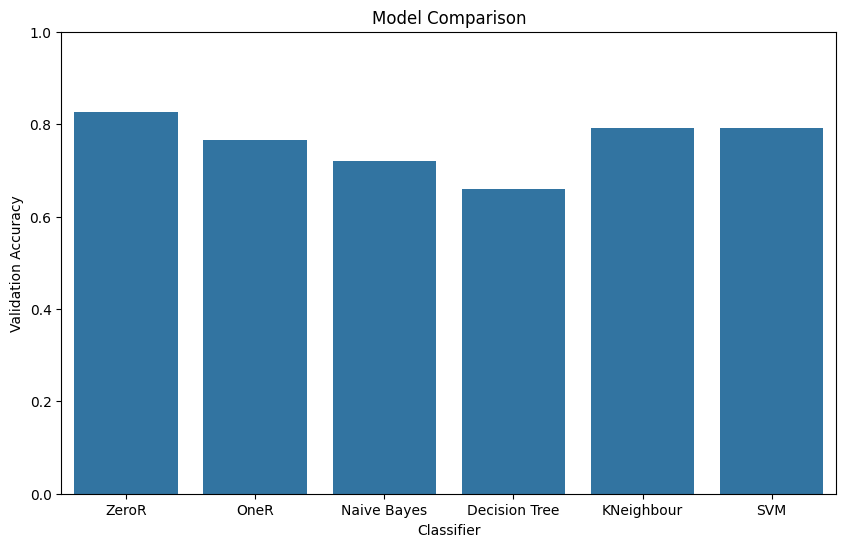

In [94]:
#dictionary of model names and validation accuracies
model_accuracies = {
    'ZeroR': val_accuracyZeroR,
    'OneR': accuracy_score(y_val_encoded, y_val_predOneR),
    'Naive Bayes': accuracy_score(y_val_encoded, y_val_pred_nb),
    'Decision Tree': accuracy_score(y_val_encoded, y_val_pred_dt),
    'KNeighbour': accuracy_score(y_val_encoded, y_val_predKN),
    'SVM': accuracy_score(y_val_encoded, y_val_predKN)
}

#bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Comparison')
plt.xlabel('Classifier')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()